In [1]:
import librosa as lr

In [2]:
import numpy as np
import pandas as pd

In [3]:
from sklearn.cluster import KMeans

In [4]:
from sklearn.preprocessing import StandardScaler

In [5]:
import warnings, os

In [19]:
pip install librosa scikit-learn pandas matplotlib

Note: you may need to restart the kernel to use updated packages.


In [26]:
import matplotlib.pyplot as plt

In [27]:
warnings.filterwarnings("ignore")

In [28]:
data = pd.read_csv("voice.csv")
features = []

In [29]:

print(data.columns)


Index(['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt',
       'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun',
       'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx', 'label'],
      dtype='object')


In [30]:





X = data.select_dtypes(include='number')


X_scaled = StandardScaler().fit_transform(X)
labels = KMeans(n_clusters=2, random_state=42, n_init=10).fit_predict(X_scaled)



In [31]:
data['cluster'] = labels
print(data.head())
data.to_csv("gender_clusters.csv", index=False)

   meanfreq        sd    median       Q25       Q75       IQR       skew  \
0  0.059781  0.064241  0.032027  0.015071  0.090193  0.075122  12.863462   
1  0.066009  0.067310  0.040229  0.019414  0.092666  0.073252  22.423285   
2  0.077316  0.083829  0.036718  0.008701  0.131908  0.123207  30.757155   
3  0.151228  0.072111  0.158011  0.096582  0.207955  0.111374   1.232831   
4  0.135120  0.079146  0.124656  0.078720  0.206045  0.127325   1.101174   

          kurt    sp.ent       sfm  ...   meanfun    minfun    maxfun  \
0   274.402906  0.893369  0.491918  ...  0.084279  0.015702  0.275862   
1   634.613855  0.892193  0.513724  ...  0.107937  0.015826  0.250000   
2  1024.927705  0.846389  0.478905  ...  0.098706  0.015656  0.271186   
3     4.177296  0.963322  0.727232  ...  0.088965  0.017798  0.250000   
4     4.333713  0.971955  0.783568  ...  0.106398  0.016931  0.266667   

    meandom    mindom    maxdom   dfrange   modindx  label  cluster  
0  0.007812  0.007812  0.007812  0

In [33]:
from sklearn.decomposition import PCA

In [34]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

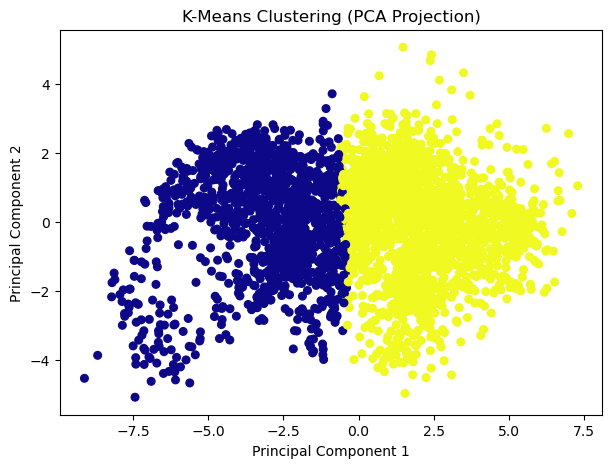

In [35]:



pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(7,5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='plasma', s=30)
plt.title("K-Means Clustering (PCA Projection)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()